# Librerias

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# 1- Empleando todos los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned-sorted-torino.csv")   

In [ ]:
#df = pd.read_csv("cleaned-sorted-torino.csv") #Lectura si está instalado en la misma carpeta


In [ ]:
df.head()

,generation_time,start_time,end_time,location_reference,lcd1,Road_LCD,Road_name,offset,direction,lat,lng,accuracy,period,flow,speed
0,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39976,39975,Corso Agnelli(TO),260,positive,45.02499,7.63621,100,5,1104.0,50.67
1,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39977,39975,Corso Agnelli(TO),423,positive,45.03193,7.64111,-1,5,660.0,44.73
2,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39978,39975,Corso Agnelli(TO),818,positive,45.04129,7.64773,100,5,1116.0,23.29
3,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39979,39975,Corso Agnelli(TO),339,negative,45.04104,7.64748,100,5,840.0,26.97
4,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39979,39975,Corso Agnelli(TO),774,negative,45.03767,7.64492,94,5,540.0,27.56


In [ ]:
df.tail()

,generation_time,start_time,end_time,location_reference,lcd1,Road_LCD,Road_name,offset,direction,lat,lng,accuracy,period,flow,speed
8627171,2020-10-01T14:26:00+02:00,2020-10-01T14:20:00+02:00,2020-10-01T14:25:00+02:00,WGS84_info,40209,40204,Corso Vittorio Emanuele II(TO),604,negative,45.06190,7.68130,0,5,0.0,0.0
8627172,2020-10-01T14:26:00+02:00,2020-10-01T14:20:00+02:00,2020-10-01T14:25:00+02:00,WGS84_info,40231,40229,Ponte Umberto I(TO),29,negative,45.05832,7.69105,0,5,0.0,0.0
8627173,2020-10-01T14:26:00+02:00,2020-10-01T14:20:00+02:00,2020-10-01T14:25:00+02:00,WGS84_info,40264,40261,Via Botticelli(TO),69,negative,45.10331,7.69614,0,5,0.0,0.0
8627174,2020-10-01T14:26:00+02:00,2020-10-01T14:20:00+02:00,2020-10-01T14:25:00+02:00,WGS84_info,40291,40290,Via Pietro Micca(TO),39,positive,45.07031,7.67812,0,5,0.0,0.0
8627175,2020-10-01T14:26:00+02:00,2020-10-01T14:20:00+02:00,2020-10-01T14:25:00+02:00,WGS84_info,40300,40299,Via Sacchi(TO),71,positive,45.05561,7.67201,0,5,0.0,0.0


In [ ]:
df.dtypes

generation_time        object
start_time             object
end_time               object
location_reference     object
lcd1                    int64
Road_LCD                int64
Road_name              object
offset                  int64
direction              object
lat                   float64
lng                   float64
accuracy                int64
period                  int64
flow                  float64
speed                 float64
dtype: object

In [ ]:
df1 = df[['lcd1','Road_LCD','offset','lat','lng','accuracy','flow','speed']]

In [ ]:
df1.head()

,lcd1,Road_LCD,offset,lat,lng,accuracy,flow,speed
0,39976,39975,260,45.02499,7.63621,100,1104.0,50.67
1,39977,39975,423,45.03193,7.64111,-1,660.0,44.73
2,39978,39975,818,45.04129,7.64773,100,1116.0,23.29
3,39979,39975,339,45.04104,7.64748,100,840.0,26.97
4,39979,39975,774,45.03767,7.64492,94,540.0,27.56


In [ ]:
df1.dtypes

lcd1          int64
Road_LCD      int64
offset        int64
lat         float64
lng         float64
accuracy      int64
flow        float64
speed       float64
dtype: object

In [ ]:
df1.shape

(8627176, 8)

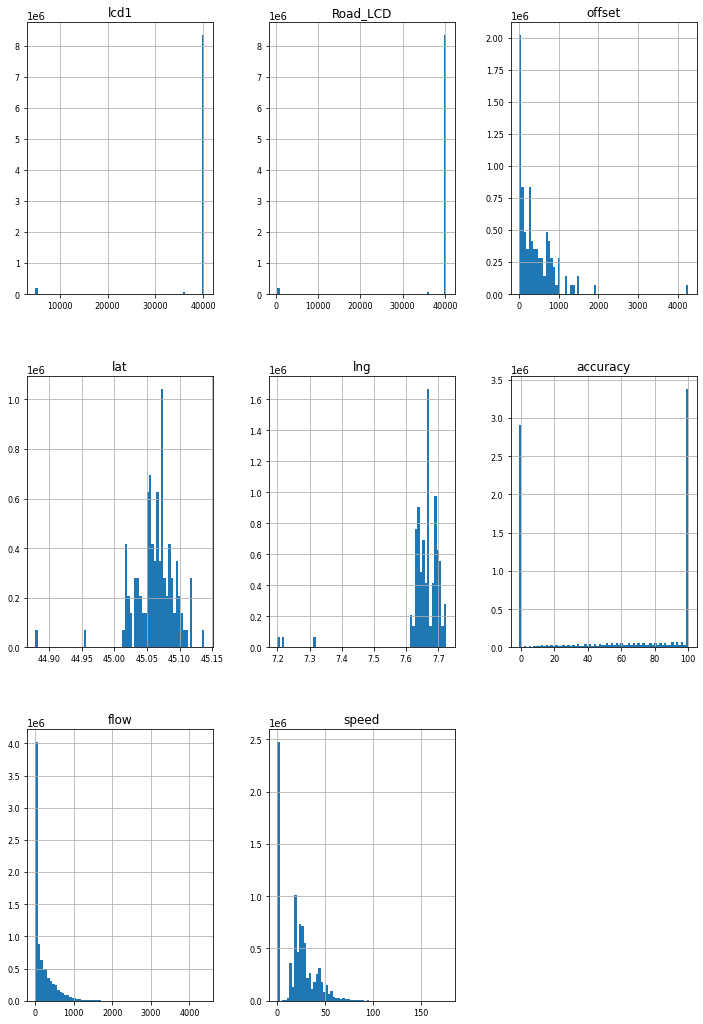

In [ ]:
df1.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8);
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
#sns.pairplot(df1)
#plt.show()

In [ ]:
df1.isnull().sum() #esto es para ver si hay missing values o NaN (es un gran problema si lo hay)

lcd1        0
Road_LCD    0
offset      0
lat         0
lng         0
accuracy    0
flow        0
speed       0
dtype: int64

['lcd1', 'Road_LCD', 'offset', 'lat', 'lng', 'accuracy', 'flow', 'speed']


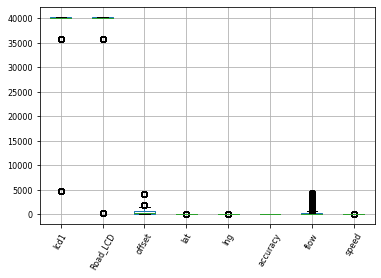

In [ ]:
# Identificación de valores anómalos (Outliers)
col_name=list(df1.columns) 
print(col_name)
boxplot = df1.boxplot(grid=True, rot=60, fontsize=8)
plt.show()

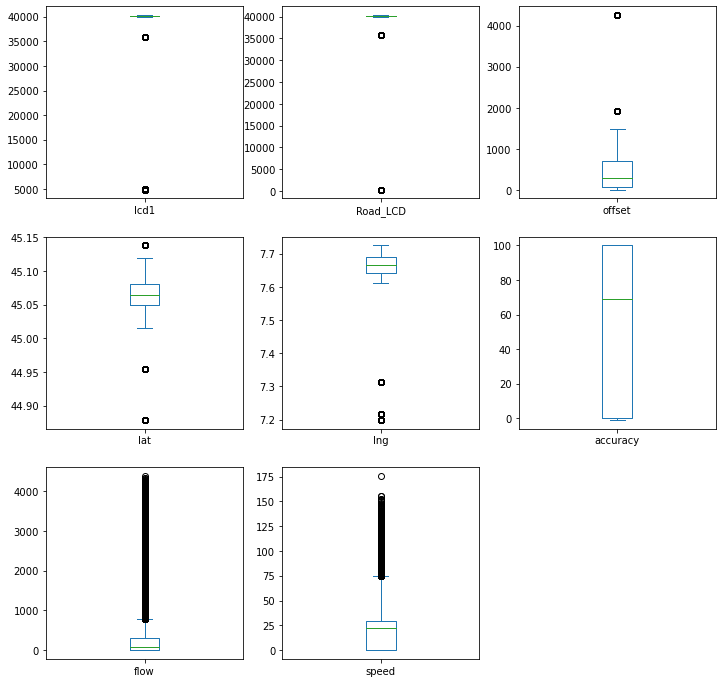

In [ ]:
#es lo mismo que la celda anterior pero ampliado para cada columna
df1.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

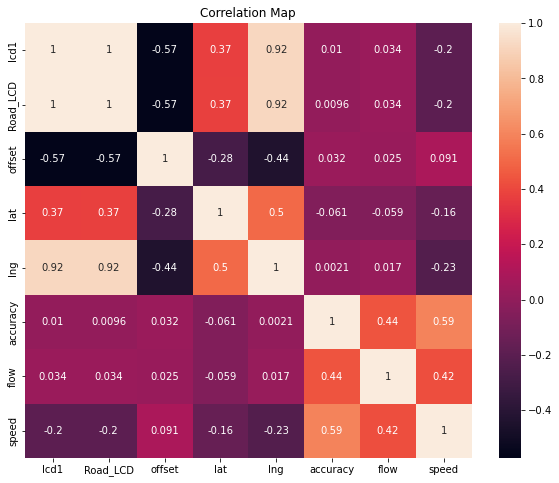

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
corr.notna()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

In [ ]:
df1.corr()

,lcd1,Road_LCD,offset,lat,lng,accuracy,flow,speed
lcd1,1.000000,0.999966,-0.572575,0.371657,0.917553,0.010384,0.034247,-0.196806
Road_LCD,0.999966,1.000000,-0.572519,0.373532,0.917987,0.009587,0.033928,-0.197507
offset,-0.572575,-0.572519,1.000000,-0.279943,-0.438240,0.032009,0.025348,0.090881
lat,0.371657,0.373532,-0.279943,1.000000,0.504389,-0.061412,-0.059209,-0.160499
lng,0.917553,0.917987,-0.438240,0.504389,1.000000,0.002063,0.017224,-0.229084
accuracy,0.010384,0.009587,0.032009,-0.061412,0.002063,1.000000,0.440883,0.593829
flow,0.034247,0.033928,0.025348,-0.059209,0.017224,0.440883,1.000000,0.421710
speed,-0.196806,-0.197507,0.090881,-0.160499,-0.229084,0.593829,0.421710,1.000000


# 2- Filtrando datos por una semana de muestras

In [ ]:
df2 = df[0:249883]

In [ ]:
df2.to_csv('cleaned-sorted-torino-filtered.csv')

7 DIAS DE DATOS

In [ ]:
df2.shape

(249883, 15)

In [ ]:
df2.head()

,generation_time,start_time,end_time,location_reference,lcd1,Road_LCD,Road_name,offset,direction,lat,lng,accuracy,period,flow,speed
0,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39976,39975,Corso Agnelli(TO),260,positive,45.02499,7.63621,100,5,1104.0,50.67
1,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39977,39975,Corso Agnelli(TO),423,positive,45.03193,7.64111,-1,5,660.0,44.73
2,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39978,39975,Corso Agnelli(TO),818,positive,45.04129,7.64773,100,5,1116.0,23.29
3,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39979,39975,Corso Agnelli(TO),339,negative,45.04104,7.64748,100,5,840.0,26.97
4,2020-01-28T17:56:00+01:00,2020-01-28T17:50:00+01:00,2020-01-28T17:55:00+01:00,WGS84_info,39979,39975,Corso Agnelli(TO),774,negative,45.03767,7.64492,94,5,540.0,27.56


In [ ]:
df2.tail()

,generation_time,start_time,end_time,location_reference,lcd1,Road_LCD,Road_name,offset,direction,lat,lng,accuracy,period,flow,speed
249878,2020-02-04T19:56:00+01:00,2020-02-04T19:50:00+01:00,2020-02-04T19:55:00+01:00,WGS84_info,40041,40039,Corso Giulio Cesare(TO),574,negative,45.11641,7.70983,-1,5,756.0,26.99
249879,2020-02-04T19:56:00+01:00,2020-02-04T19:50:00+01:00,2020-02-04T19:55:00+01:00,WGS84_info,40041,40039,Corso Giulio Cesare(TO),938,positive,45.10447,7.70151,99,5,1410.0,37.54
249880,2020-02-04T19:56:00+01:00,2020-02-04T19:50:00+01:00,2020-02-04T19:55:00+01:00,WGS84_info,40042,40039,Corso Giulio Cesare(TO),1203,positive,45.09244,7.69374,100,5,180.0,20.00
249881,2020-02-04T19:56:00+01:00,2020-02-04T19:50:00+01:00,2020-02-04T19:55:00+01:00,WGS84_info,40042,40039,Corso Giulio Cesare(TO),831,negative,45.10900,7.70485,100,5,996.0,33.92
249882,2020-02-04T19:56:00+01:00,2020-02-04T19:50:00+01:00,2020-02-04T19:55:00+01:00,WGS84_info,40043,40039,Corso Giulio Cesare(TO),306,negative,45.09451,7.69536,100,5,612.0,23.21


In [ ]:
df2 = df2[['lcd1','Road_LCD','offset','lat','lng','accuracy','flow','speed']]

In [ ]:
df2.head()

,lcd1,Road_LCD,offset,lat,lng,accuracy,flow,speed
0,39976,39975,260,45.02499,7.63621,100,1104.0,50.67
1,39977,39975,423,45.03193,7.64111,-1,660.0,44.73
2,39978,39975,818,45.04129,7.64773,100,1116.0,23.29
3,39979,39975,339,45.04104,7.64748,100,840.0,26.97
4,39979,39975,774,45.03767,7.64492,94,540.0,27.56


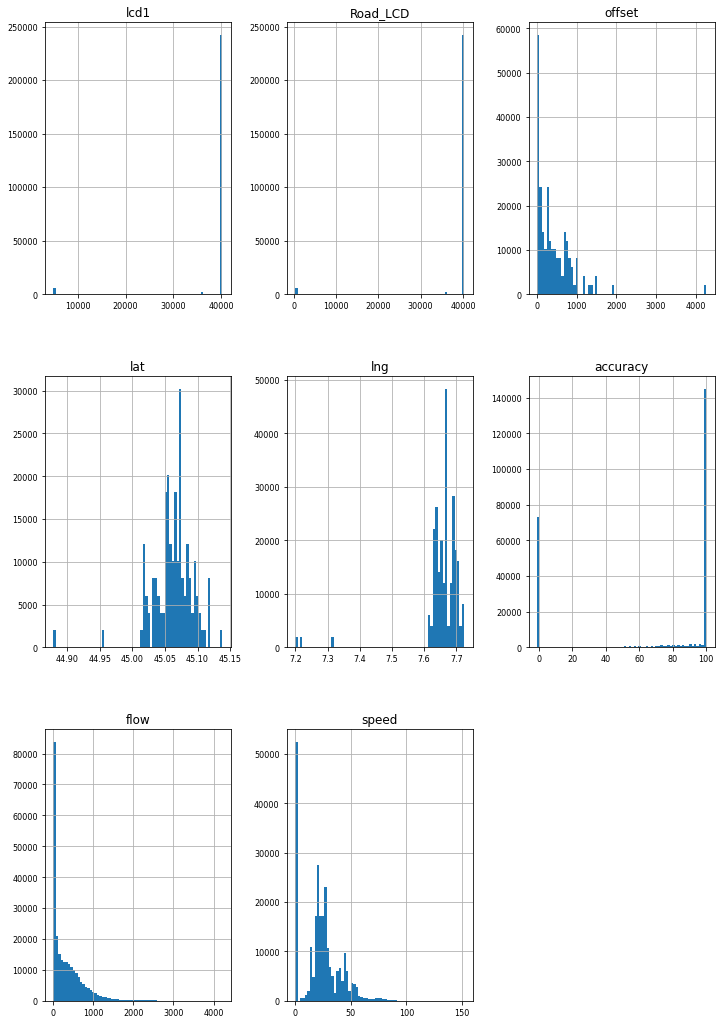

In [ ]:
df2.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8);
plt.show()

In [ ]:
df2.isnull().sum() #esto es para ver si hay missing values o NaN (es un gran problema si lo hay)

lcd1        0
Road_LCD    0
offset      0
lat         0
lng         0
accuracy    0
flow        0
speed       0
dtype: int64

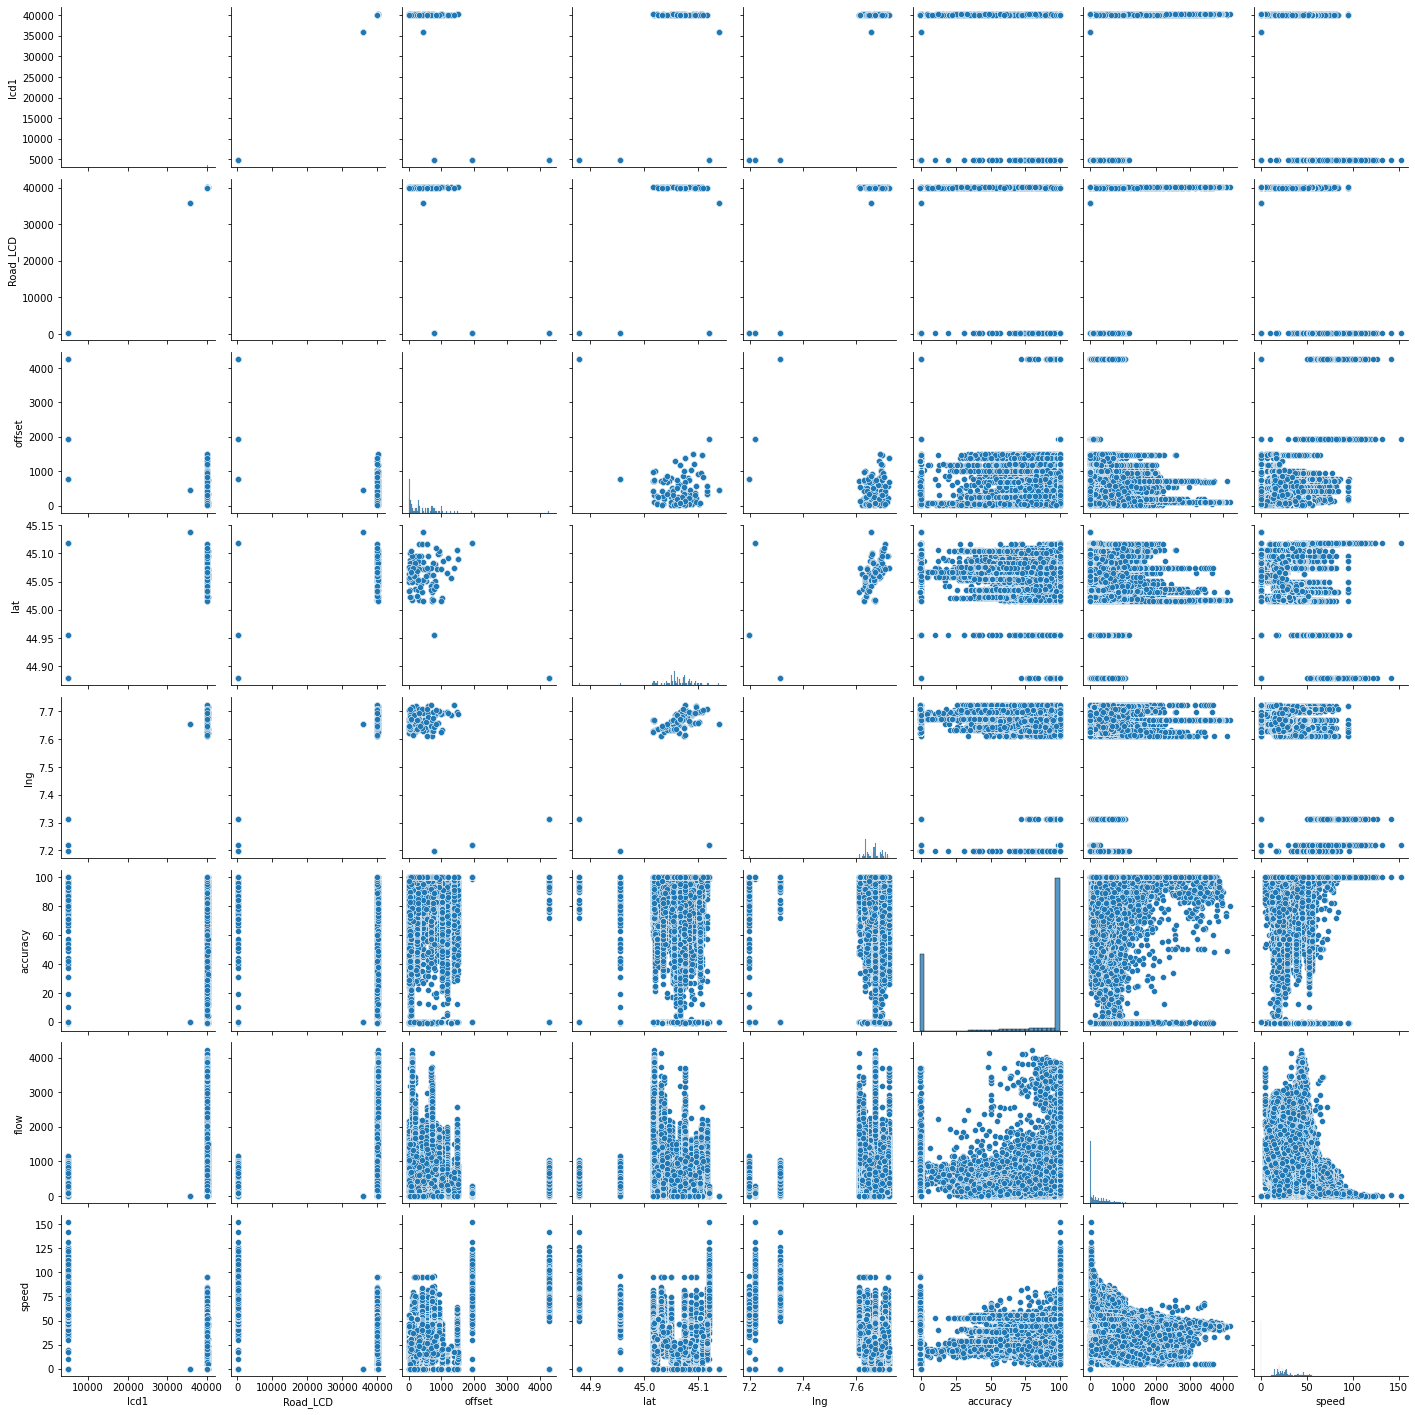

In [ ]:
sns.pairplot(df2)
plt.show()

['lcd1', 'Road_LCD', 'offset', 'lat', 'lng', 'accuracy', 'flow', 'speed']


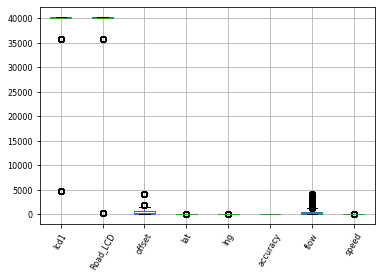

In [ ]:
# Identificación de valores anómalos (Outliers)
col_name=list(df2.columns) 
print(col_name)
boxplot = df2.boxplot(grid=True, rot=60, fontsize=8)
plt.show()

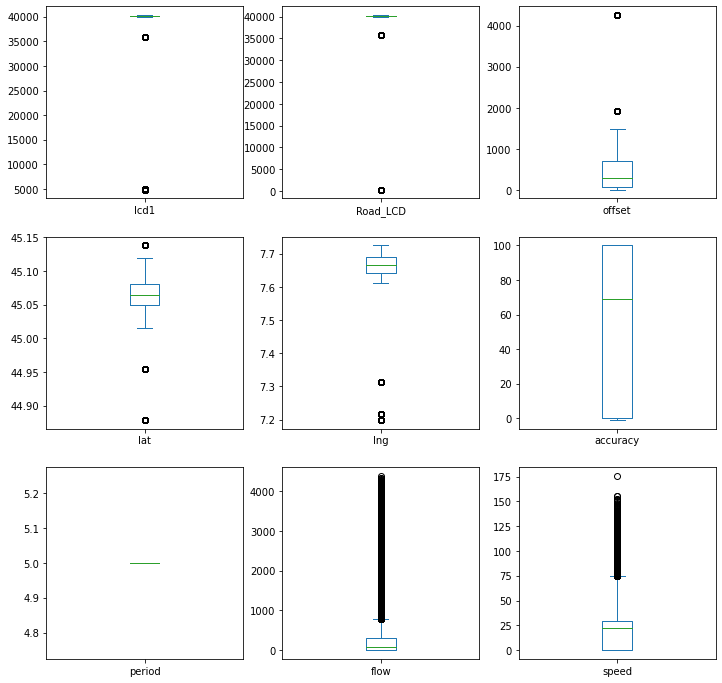

In [ ]:
#es lo mismo que la celda anterior pero ampliado para cada columna
df.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

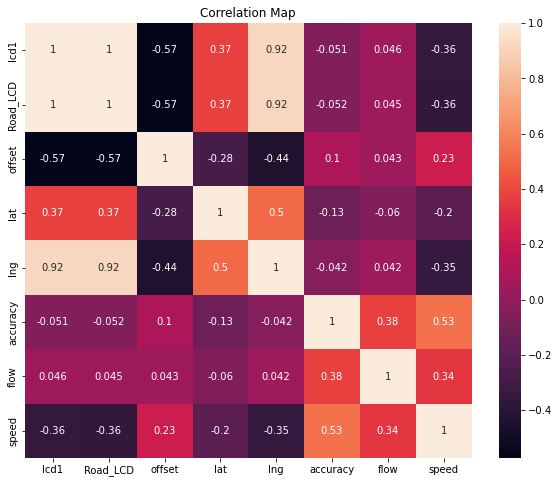

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
corr.notna()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

In [ ]:
df2.corr()

,lcd1,Road_LCD,offset,lat,lng,accuracy,flow,speed
lcd1,1.000000,0.999966,-0.572558,0.371644,0.917543,-0.051160,0.045627,-0.357145
Road_LCD,0.999966,1.000000,-0.572502,0.373519,0.917977,-0.052220,0.045261,-0.358046
offset,-0.572558,-0.572502,1.000000,-0.279906,-0.438209,0.101017,0.042916,0.225399
lat,0.371644,0.373519,-0.279906,1.000000,0.504394,-0.126716,-0.060162,-0.196579
lng,0.917543,0.917977,-0.438209,0.504394,1.000000,-0.042105,0.041882,-0.349009
accuracy,-0.051160,-0.052220,0.101017,-0.126716,-0.042105,1.000000,0.376417,0.531756
flow,0.045627,0.045261,0.042916,-0.060162,0.041882,0.376417,1.000000,0.340811
speed,-0.357145,-0.358046,0.225399,-0.196579,-0.349009,0.531756,0.340811,1.000000


# 3- Visualizando datos solo para Road_LCD únicos

In [ ]:
df3 = df1.drop_duplicates(subset=['Road_LCD'])

In [ ]:
df3 = df3[['lcd1','Road_LCD','offset','lat','lng','accuracy','flow','speed']]

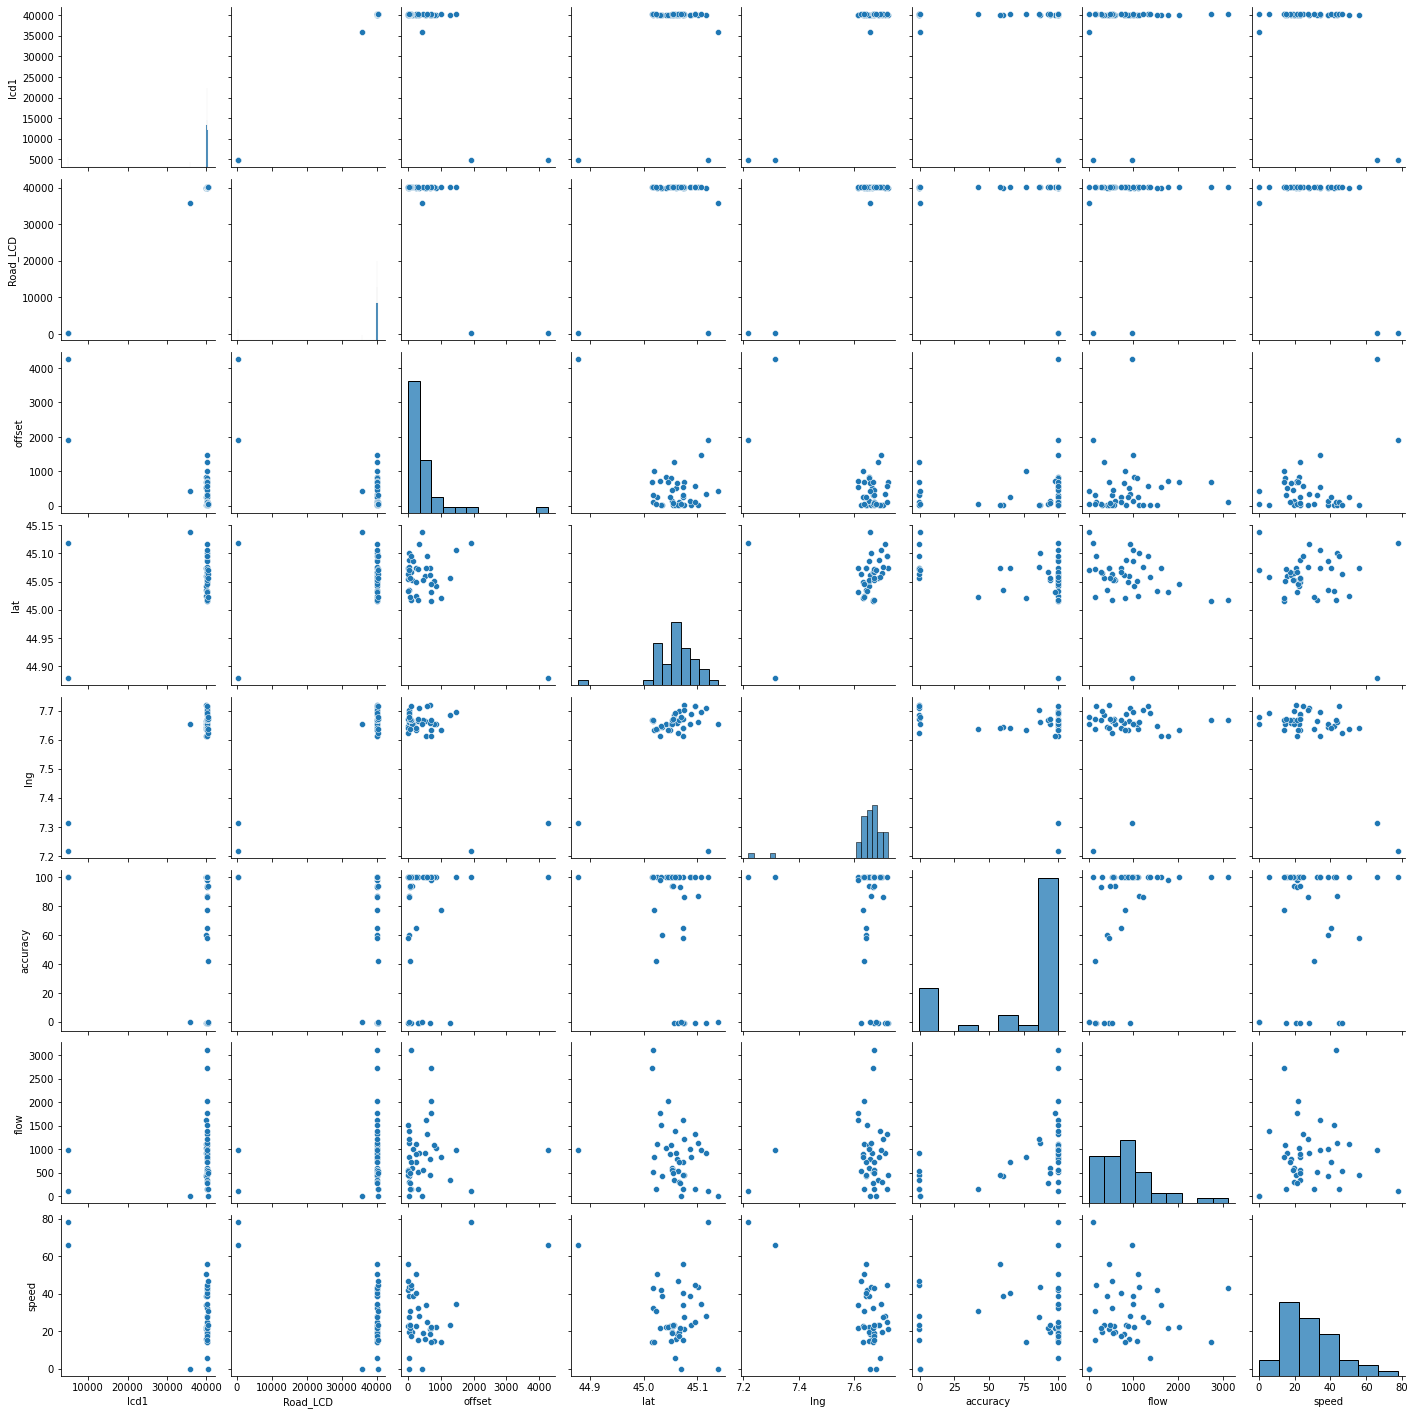

In [ ]:
sns.pairplot(df3)
plt.show()

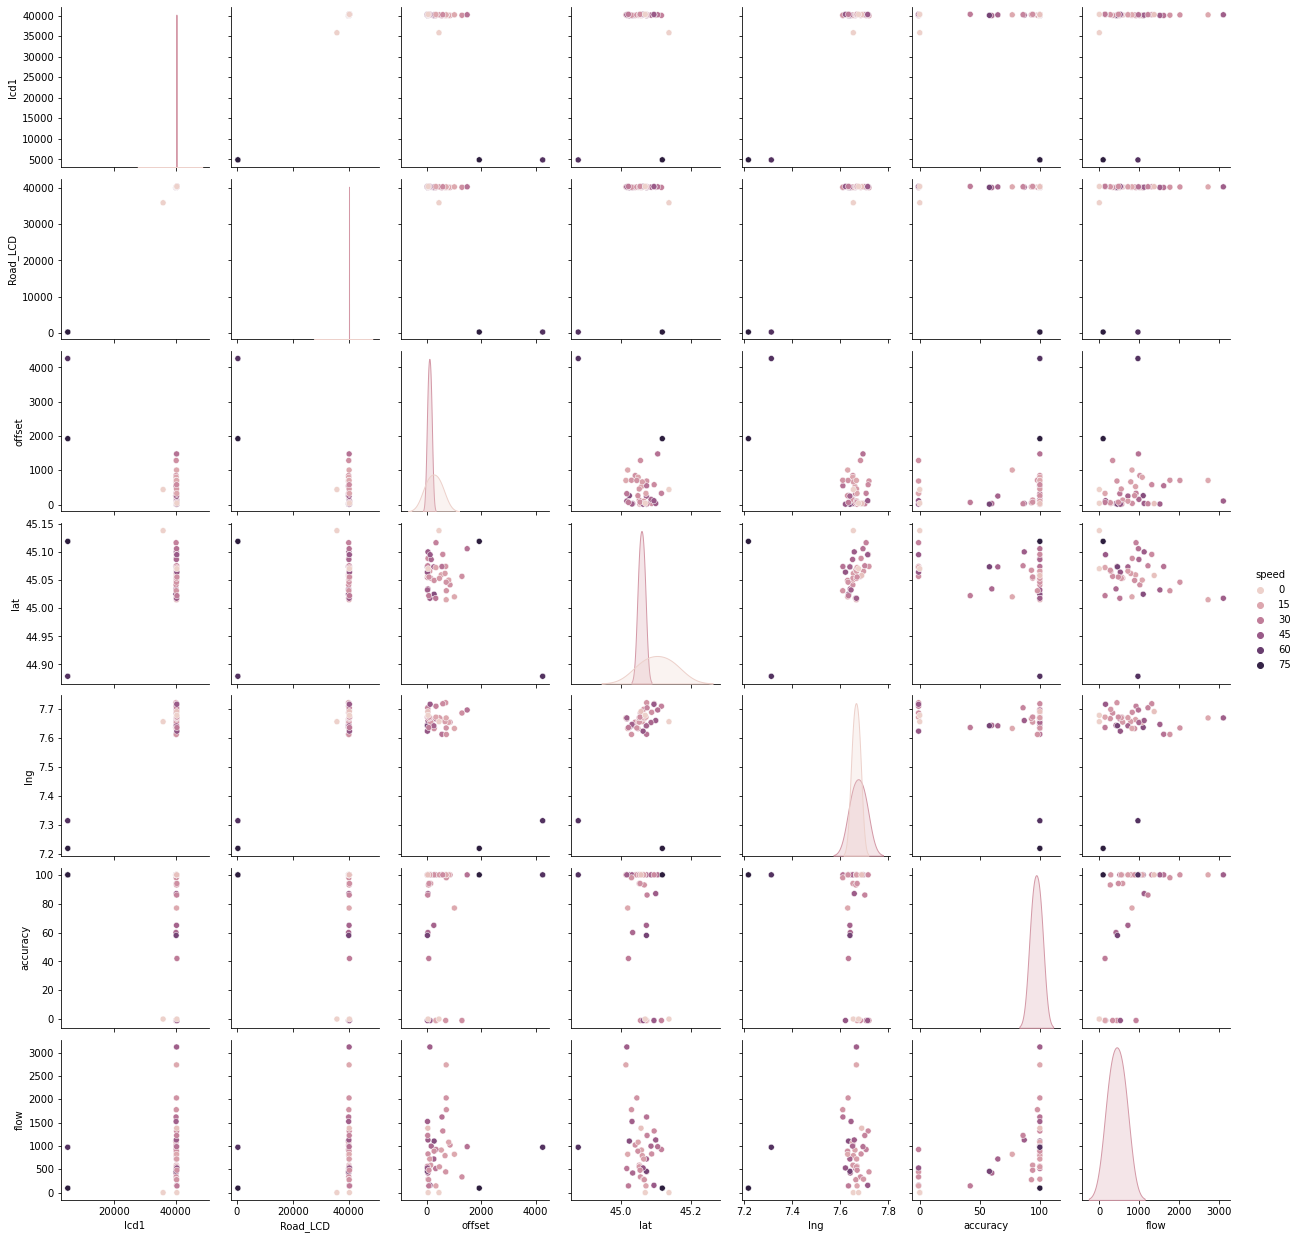

In [ ]:
sns.pairplot(df3, hue = 'speed')
plt.show()


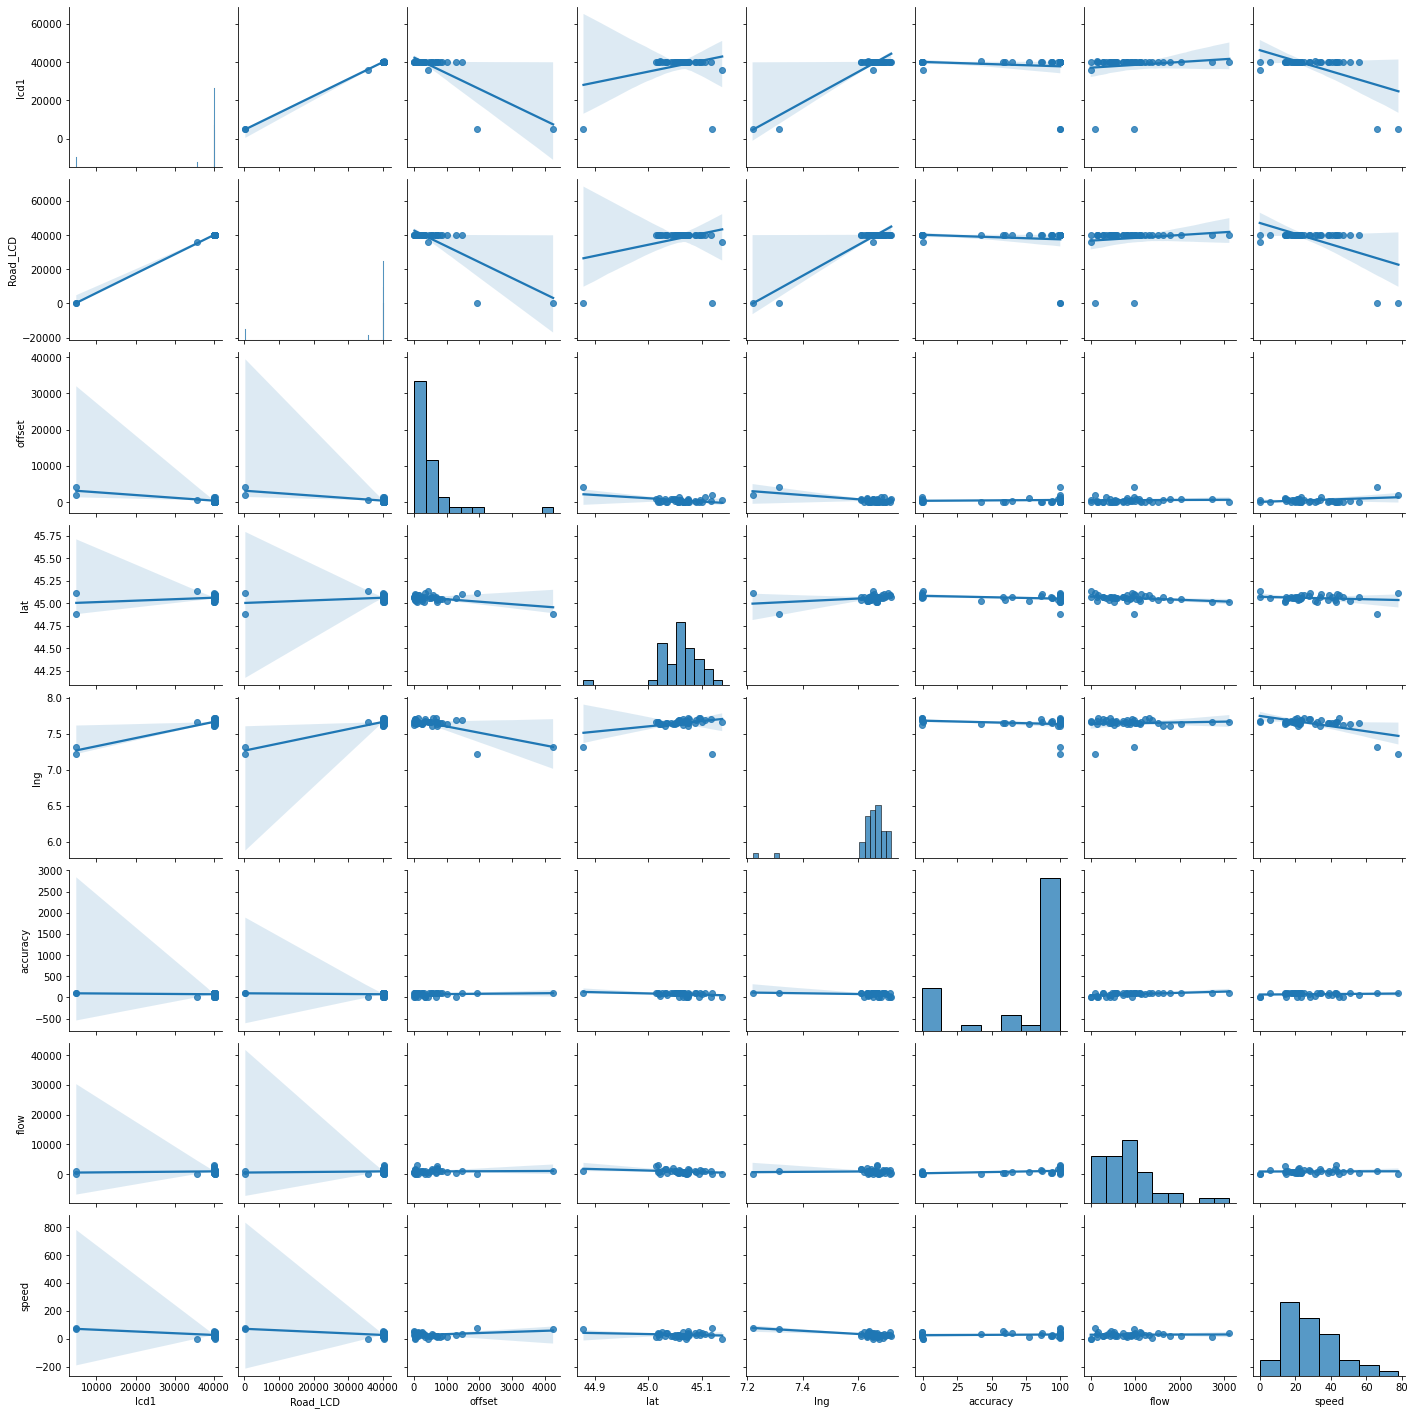

In [ ]:
sns.pairplot(df3, kind="reg")
plt.show()

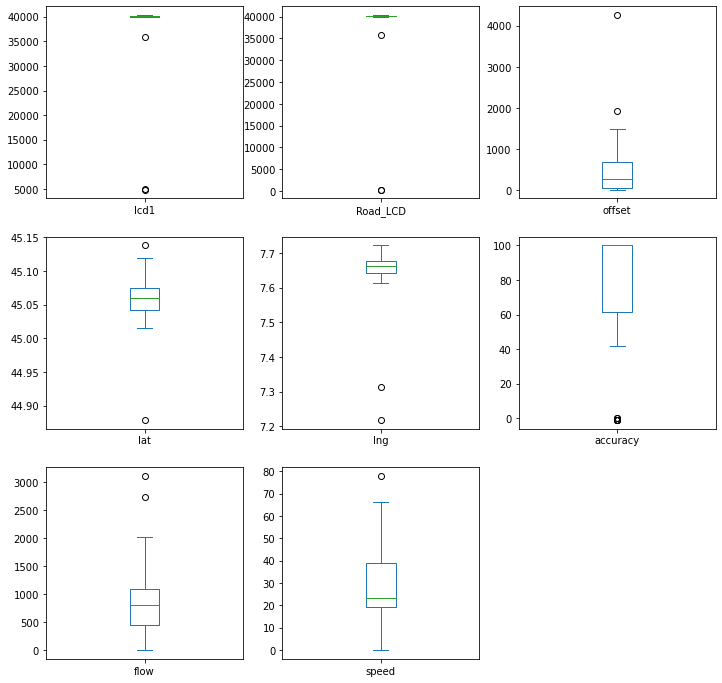

In [ ]:
#es lo mismo que la celda anterior pero ampliado para cada columna
df3.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

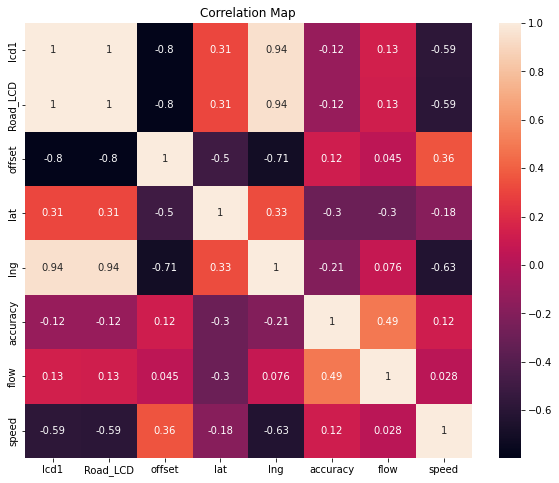

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df3.corr()
corr.notna()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

In [ ]:
df3.corr()

,lcd1,Road_LCD,offset,lat,lng,accuracy,flow,speed
lcd1,1.000000,0.999950,-0.796998,0.305591,0.944130,-0.119405,0.129918,-0.585812
Road_LCD,0.999950,1.000000,-0.797204,0.308518,0.944770,-0.122227,0.128197,-0.588687
offset,-0.796998,-0.797204,1.000000,-0.499758,-0.710990,0.120881,0.044621,0.360626
lat,0.305591,0.308518,-0.499758,1.000000,0.330942,-0.304521,-0.299324,-0.184151
lng,0.944130,0.944770,-0.710990,0.330942,1.000000,-0.205854,0.076153,-0.633705
accuracy,-0.119405,-0.122227,0.120881,-0.304521,-0.205854,1.000000,0.487540,0.120526
flow,0.129918,0.128197,0.044621,-0.299324,0.076153,0.487540,1.000000,0.027636
speed,-0.585812,-0.588687,0.360626,-0.184151,-0.633705,0.120526,0.027636,1.000000


ML-3. Clustering sobre dataframe

In [ ]:
from sklearn import preprocessing 
from sklearn.cluster import KMeans
# Importamos las librerias necesarias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.io as pio
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings

In [ ]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df2)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'lcd1', 1: 'Road_LCD', 2: 'offset', 3:'lat',4:'lng',5:'accuracy',6:'flow',7:'speed'})

In [ ]:
df_escalado.head()

,lcd1,Road_LCD,offset,lat,lng,accuracy,flow,speed
0,0.990525,0.991645,0.059972,0.563373,0.831806,1.000000,0.261364,0.333355
1,0.990553,0.991645,0.098307,0.590158,0.841139,0.000000,0.156250,0.294276
2,0.990581,0.991645,0.191204,0.626283,0.853747,1.000000,0.264205,0.153224
3,0.990609,0.991645,0.078551,0.625318,0.853271,1.000000,0.198864,0.177434
4,0.990609,0.991645,0.180856,0.612312,0.848395,0.940594,0.127841,0.181316


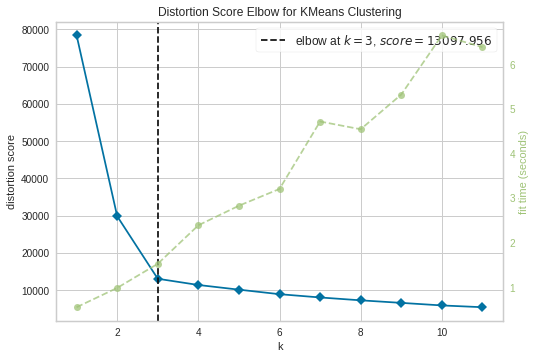

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_escalado)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df_escalado['cluster'] = kmeans.fit_predict(df_escalado[['accuracy', 'flow','speed']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df_escalado['cen_x'] = df_escalado.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df_escalado['cen_y'] = df_escalado.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df_escalado['c'] = df_escalado.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})


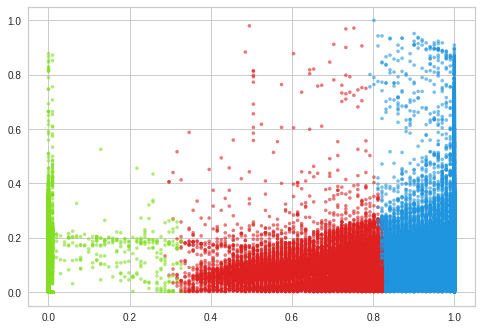

In [ ]:
plt.scatter(df_escalado.accuracy, df_escalado.flow, c=df_escalado.c, alpha = 0.6, s=10)

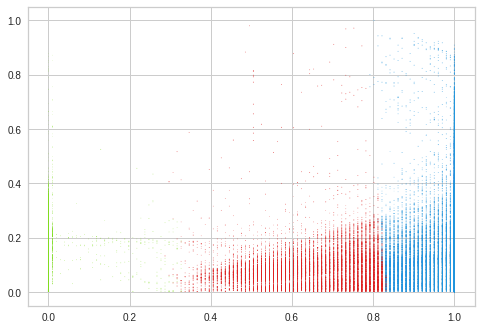

In [ ]:
plt.scatter(df_escalado.accuracy, df_escalado.flow, c=df_escalado.c, s=df_escalado.speed, alpha = 0.6)

(0.0, 1.0)

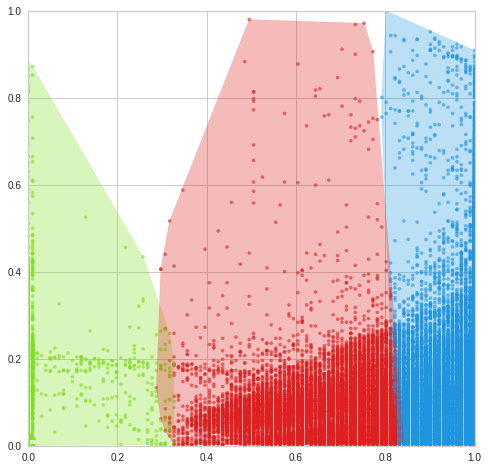

In [ ]:
from scipy.spatial import ConvexHull
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df_escalado.accuracy, df_escalado.flow, c=df_escalado.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df_escalado.cluster.unique():
    points = df_escalado[df_escalado.cluster == i][['accuracy', 'flow']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,1)
plt.ylim(0,1)